All imports:

In [139]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

define helpful functions

In [140]:
def display_image(mat_like, cmap="rgb"):
    plt.figure()
    if cmap != "rgb":
        plt.imshow(mat_like, cmap=cmap)
    else:
        plt.imshow(mat_like)
    plt.show()
    plt.close()

In [ ]:
kernel = np.array(
        [
            [0, 1, 1, 1, 0],
            [1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1],
            [0, 1, 1, 1, 0],
        ],
        dtype=np.uint8,
    )

def erode(img, amount=1):
    for _ in range(amount):
        img = cv2.erode(img, kernel)

    return img


def dilate(img, amount=1):
    

    for _ in range(amount):
        img = cv2.dilate(img, kernel)

    return img


def clean_image(gray):
    # _, gray = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)
    # gray = cv2.adaptiveThreshold(
    #     gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_TOZERO_INV, 21, 25
    # )
    # gray = cv2.equalizeHist(gray)
    # display_image(gray, "gray")
    gray = cv2.equalizeHist(gray)
    display_image(gray, "gray")
    gray = 255 - gray
    display_image(gray, "gray")
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(13, 13))
    gray = cv2.medianBlur(gray, 31)
    gray = clahe.apply(gray)

    _, gray = cv2.threshold(gray, 230, 255, cv2.THRESH_BINARY)
    display_image(gray, "gray")
    
    gray = dilate(gray, 15)
    display_image(gray, "gray")
    
    gray = erode(gray, 30)
    display_image(gray, "gray")
    
    gray = dilate(gray, 20)
    display_image(gray, "gray")

    return gray

    # gray = cv2.equalizeHist(gray)
    # gray = cv2.medianBlur(gray, 21)

In [142]:
def get_circles(gray, color):
    gray = clean_image(gray)
    # display_image(gray, "gray")
    circles = cv2.HoughCircles(
        gray,
        cv2.HOUGH_GRADIENT,
        dp=1,  # down sample size
        minDist=100,  # minimum distance between detected circles
        param1=10,
        param2=10,
        minRadius=10,
        maxRadius=100,
    )

    if circles is None:
        print("no matches")
        return
    
    color_img_cpy = np.copy(color)
    circles = np.uint(np.around(circles))

    for circle in circles[0, :]:
        x, y, r = circle[0], circle[1], circle[2]
        cv2.circle(color_img_cpy, (x, y), r, (255, 255, 255), 15)

    display_image(color_img_cpy)

Load Image folders

In [143]:
current_folder = os.getcwd()
root_data_folder = os.path.join(current_folder, "local_data")
random_frames_folder = os.path.join(root_data_folder, "random_frames")
sequence_1_folder = os.path.join(root_data_folder, "sequence_1")
sequence_2_folder = os.path.join(root_data_folder, "sequence_2")
sequence_3_folder = os.path.join(root_data_folder, "sequence_3")
sequence_4_folder = os.path.join(root_data_folder, "sequence_4")

load one image for testing

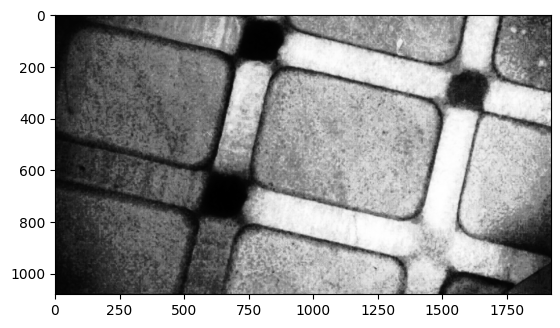

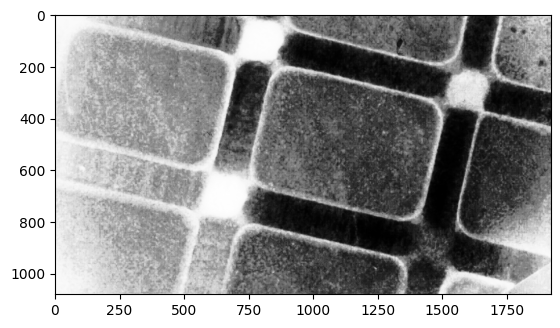

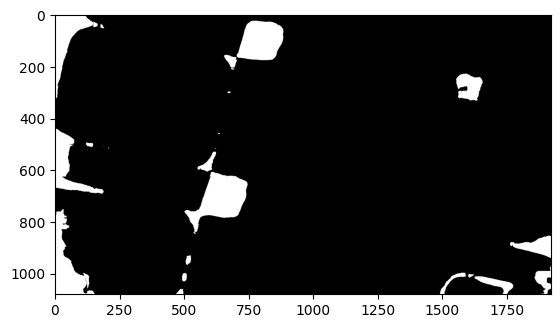

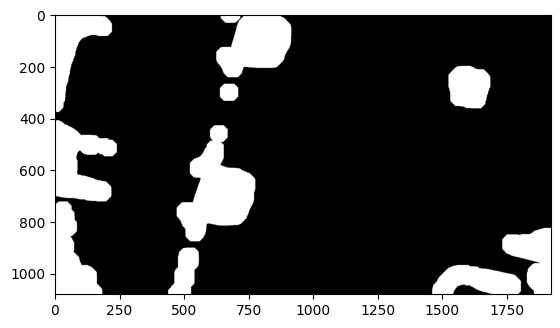

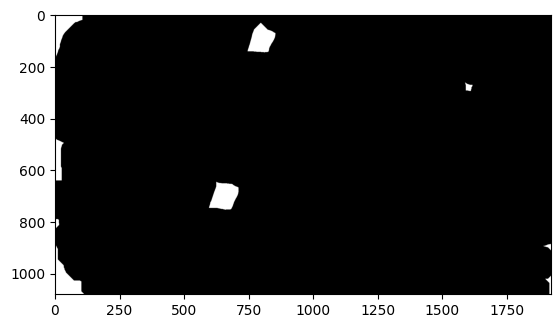

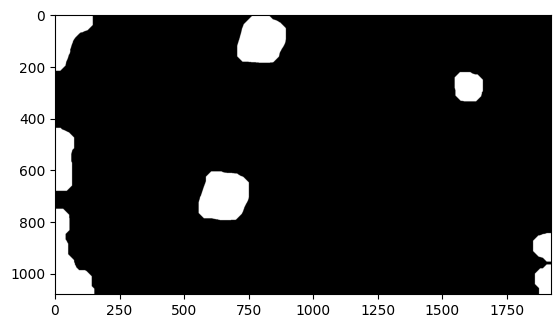

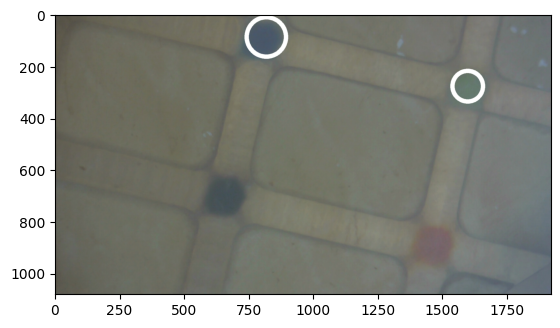

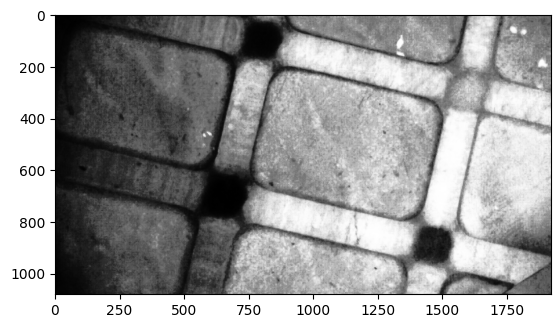

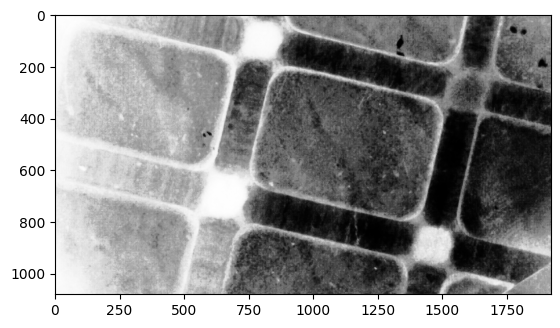

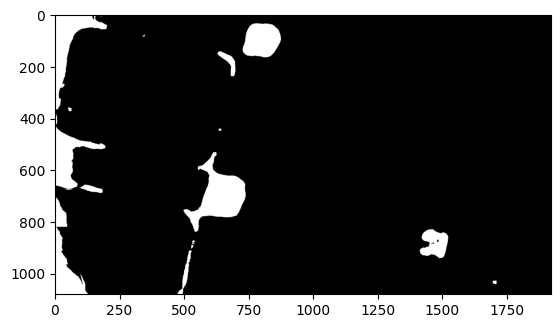

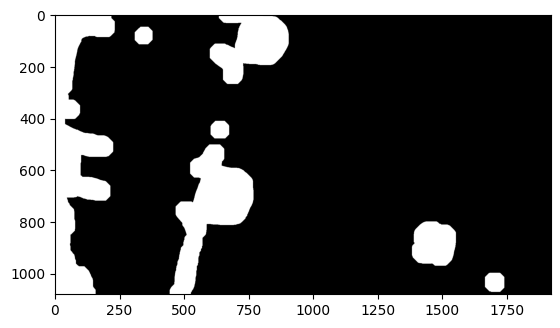

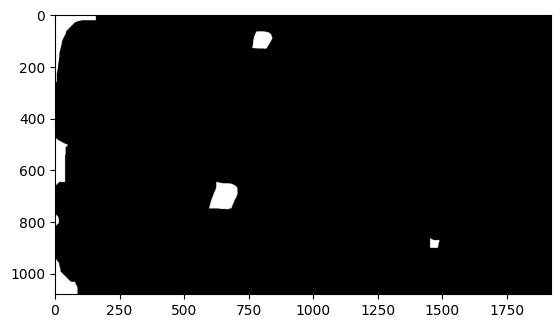

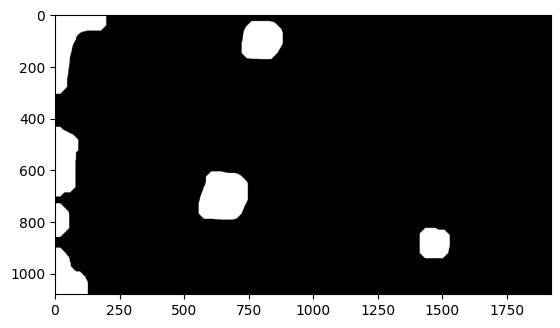

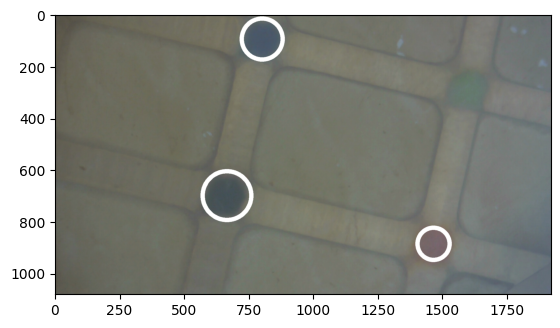

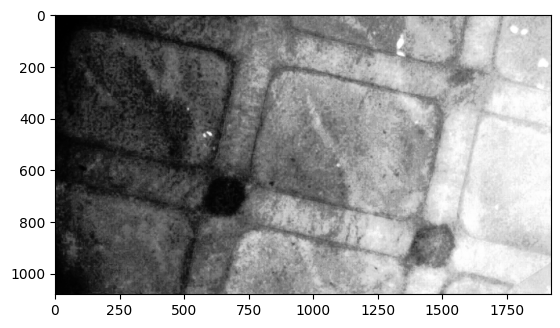

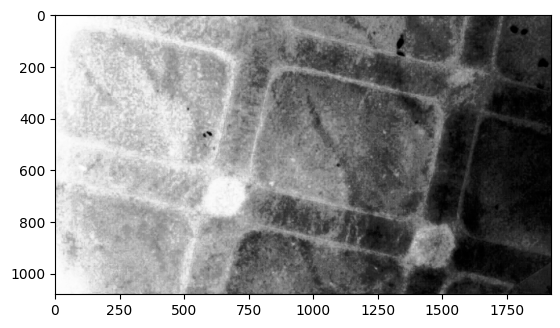

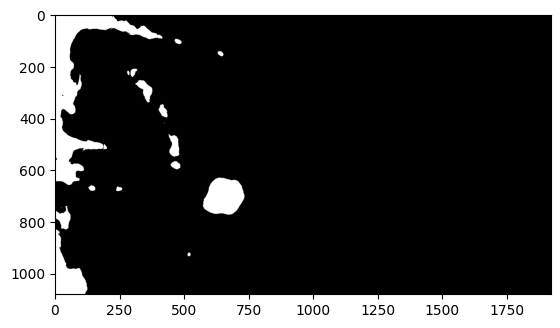

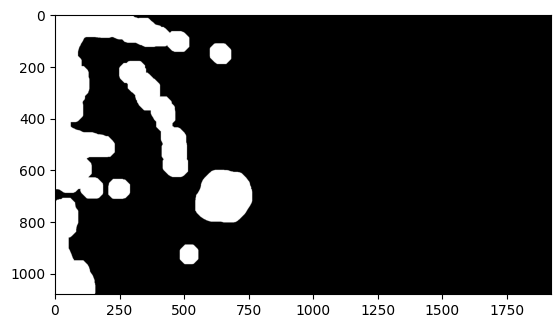

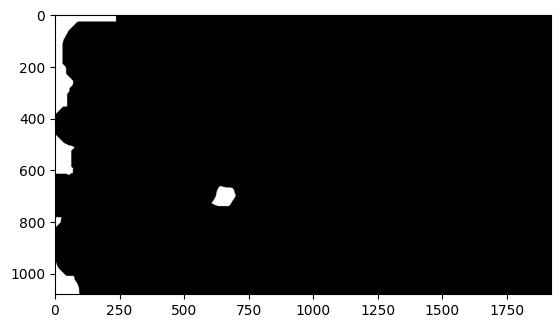

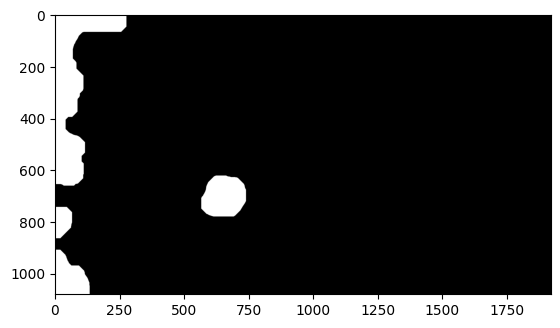

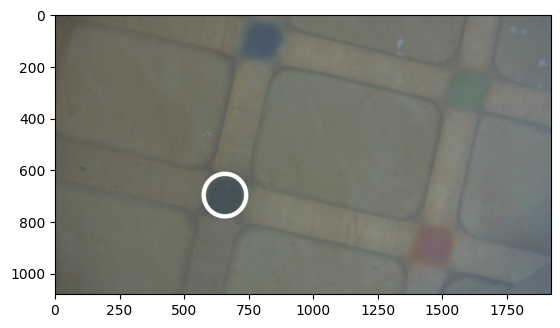

In [144]:
img_path = os.path.join(random_frames_folder, "random_001.jpg")

rnd_img = cv2.imread(img_path)
color = cv2.cvtColor(rnd_img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(rnd_img, cv2.COLOR_BGR2GRAY)

# display_image(gray, "gray")

r, g, b = cv2.split(color)

# display_image(r, "gray")
get_circles(r, color)
# display_image(g, "gray")
get_circles(g, color)
# display_image(b, "gray")
get_circles(b, color)

# display_image(rnd_img_gray)